In [1]:
#installing packages
devtools::install_github("tidyverse/ggplot2", lib = "/kaggle/working")
devtools::install_github("r-lib/scales", lib = "/kaggle/working")

tibble (3.1.7 -> 3.1.8) [CRAN]


Installing 1 packages: tibble

Warning message in i.p(...):
“installation of package ‘tibble’ had non-zero exit status”


✔  checking for file ‘/tmp/RtmpdfrKWh/remotese7edecb30/tidyverse-ggplot2-058a9bc/DESCRIPTION’
─  preparing ‘ggplot2’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts (445ms)
─  checking for empty or unneeded directories
─  building ‘ggplot2_3.3.6.9000.tar.gz’
   



✔  checking for file ‘/tmp/RtmpdfrKWh/remotese34a42124/r-lib-scales-a2552d2/DESCRIPTION’
─  preparing ‘scales’:
✔  checking DESCRIPTION meta-information
─  installing the package to process help pages
   Loading required package: scales
─  saving partial Rd database
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  building ‘scales_1.2.0.9000.tar.gz’
   


In [2]:
library(ggplot2)
library(scales)

In [3]:
#importing csv file
cust_segm<- read.csv ("../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv")
head(cust_segm)

CustomerID Gender Age Annual.Income..k.. Spending.Score..1.100.
1 1          Male   19  15                 39                    
2 2          Male   21  15                 81                    
3 3          Female 20  16                  6                    
4 4          Female 23  16                 77                    
5 5          Female 31  17                 40                    
6 6          Female 22  17                 76

In [4]:
cust_segm$Annual.Income <- cust_segm$Annual.Income..k..
cust_segm$Spending.Score <- cust_segm$Spending.Score..1.100.

In [5]:
#check for null values
colSums(is.na(cust_segm))

CustomerID                 Gender                    Age 
                     0                      0                      0 
    Annual.Income..k.. Spending.Score..1.100.          Annual.Income 
                     0                      0                      0 
        Spending.Score 
                     0

In [6]:
#converting gender to categorical variable
cust_segm$gen_cat[cust_segm$Gender=="Female"]<- 0
cust_segm$gen_cat[cust_segm$Gender=="Male"]<- 1
cust_segm$gen_cat<-factor(cust_segm$gen_cat)

In [7]:
cust_segm<-cust_segm[c("CustomerID","Age","Annual.Income","Spending.Score","gen_cat")]

[1] 270030.56 181412.61 106397.21  73728.62  44497.19  37282.49  30275.69
 [8]  25034.05  22803.13  19716.73

Warning message:
“Continuous limits supplied to discrete scale.
Did you mean `limits = factor(...)` or `scale_*_continuous()`?”


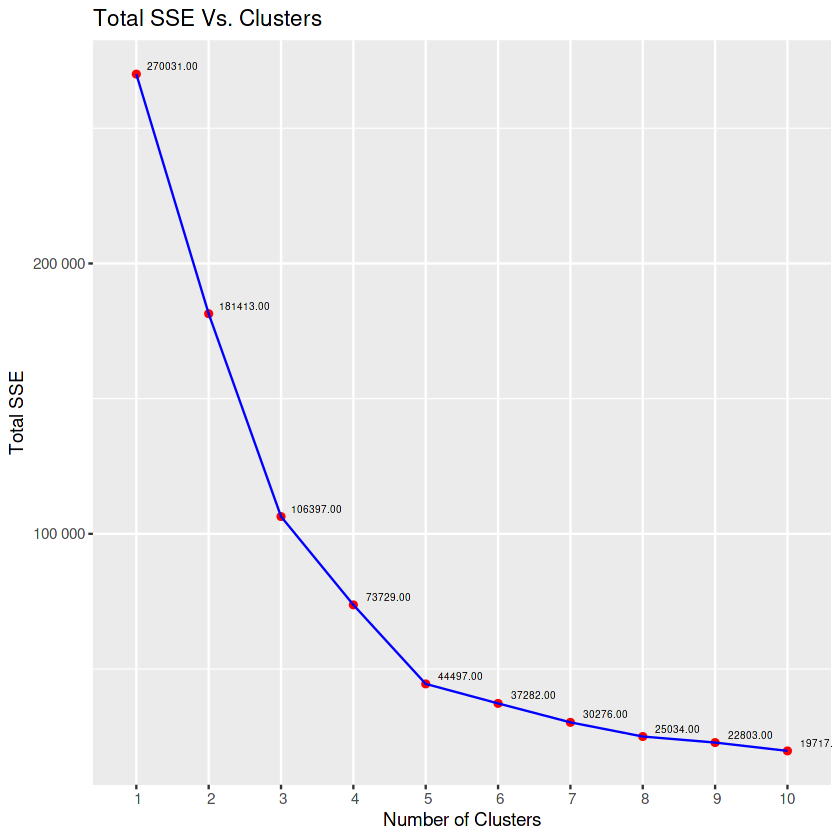

In [8]:
#determining fields for clustering
field_used <- c('Annual.Income','Spending.Score','gen_cat')

#determining the ideal number of cluster
set.seed(1)
sse <- sapply(1:10,function(k_par){kmeans(cust_segm[field_used],centers=k_par,nstart=25)$tot.withinss})
sse
ssplot <- data.frame(cluster=c(1:10),sse)
ggplot(ssplot,aes(x=cluster,y=sse)) + geom_point(color ="red") + geom_line(color='blue') +
  geom_text(aes(label=format(round(sse), nsmall = 2)),hjust=-0.2, vjust=-0.5, size= 2) +
  scale_x_discrete(limits=c(1:10)) + scale_y_continuous(labels=scales::number) + 
  xlab("Number of Clusters") + ylab("Total SSE") + labs(title ="Total SSE Vs. Clusters")


In [9]:
#customer segmentation
segment <- kmeans(x=cust_segm[field_used], centers=5, nstart=25)
segment$size
cust_segm$cluster <- segment$cluster
head(cust_segm)

[1] 81 22 35 23 39

CustomerID Age Annual.Income Spending.Score gen_cat cluster
1 1          19  15            39             1       4      
2 2          21  15            81             1       2      
3 3          20  16             6             0       4      
4 4          23  16            77             0       2      
5 5          31  17            40             0       4      
6 6          22  17            76             0       2

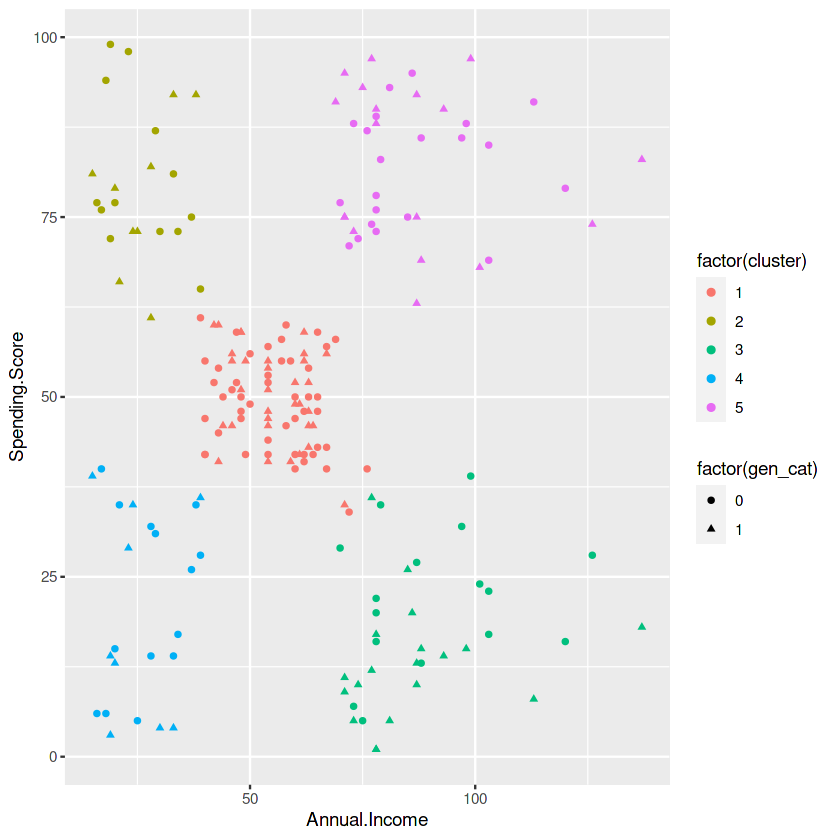

In [10]:
#plottingg the segmentation
ggplot(cust_segm, aes (x=Annual.Income, y= Spending.Score)) +
  geom_point (aes(color=factor(cluster),shape=factor(gen_cat))) 

In [11]:
#Identifying the cluster
cluster_identity <- data.frame(Cluster=c(1,2,3,4,5),
                        Categories=c("Lower Spending Lower Income",
                                     "Higher Spending Lower Income",
                                     "Average Spending and Income",
                                     "Higher Spending Higher Income",
                                     "Lower Spending Higher Income"))
cluster_identity

Cluster Categories                   
1 1       Lower Spending Lower Income  
2 2       Higher Spending Lower Income 
3 3       Average Spending and Income  
4 4       Higher Spending Higher Income
5 5       Lower Spending Higher Income

**Conclusion and Recommendation**
The customers are distributed in 5 clusters. The main objective is to attract customer to increase their spending as well as keeping the existing big spender customers.
* The majority of customer are in cluster 3 (average spending, average income, dominated by women). To increase their spending, we could set the customers for subscriptions plan in which they could earn point everytime they shop and could redeem the points for certain amount of discount. 
* For cluster 5 (lower spending, higher income, dominated by men), we should provide more luxurious goods for men.
* Lastly, to keep the loyalty of big spender customers, the mall could set up a VIP membership to give the exclusive experience for the customers.